In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [25]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train[0].shape

(28, 28)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
X_test[0].shape

(28, 28)

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

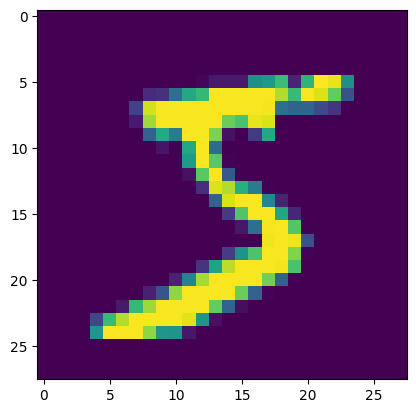

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

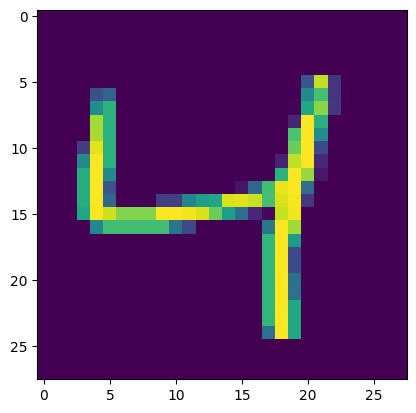

In [32]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [33]:
#normalizing
X_train = X_train/255
X_test = X_test/255

In [34]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [56]:
model = Sequential()
#28x28 is higher dimensional concerting it into 1D using flatten layer
model.add(Flatten(input_shape=(28,28)))
#first hidden layer settint it nodes to be 128
model.add(Dense(128,activation='relu'))
#second hidden layer settint it nodes to be 64
model.add(Dense(12,activation='relu'))
#output layer setting it's nodes to 10 because digits are 0-9
model.add(Dense(10, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 12)                1548      
                                                                 
 dense_12 (Dense)            (None, 10)                130       
                                                                 
Total params: 102158 (399.05 KB)
Trainable params: 102158 (399.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [59]:
history=model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3332 - accuracy: 0.9025 - val_loss: 0.1608 - val_accuracy: 0.9527
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1390 - accuracy: 0.9591 - val_loss: 0.1207 - val_accuracy: 0.9637
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0961 - accuracy: 0.9709 - val_loss: 0.1056 - val_accuracy: 0.9668
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0725 - accuracy: 0.9781 - val_loss: 0.1075 - val_accuracy: 0.9681
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.0955 - val_accuracy:

In [60]:
y_prob= model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [61]:
y_pred = y_prob.argmax(axis=1)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9706

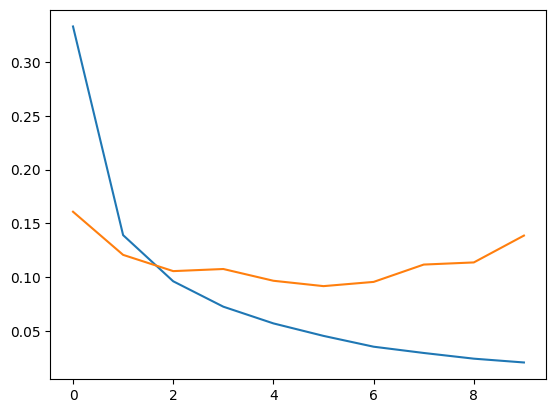

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

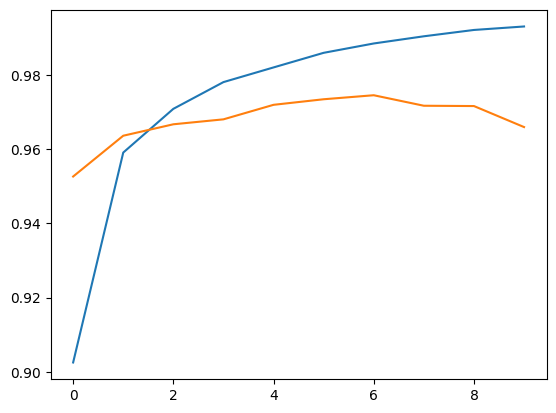

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

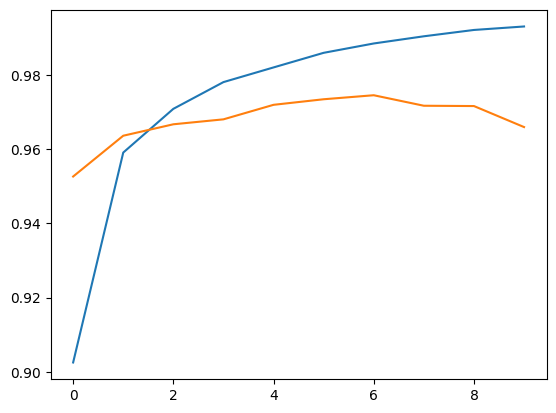

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [66]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([2])